> # 토픽 모델링 
<br>

토픽 모델링이란 문서 집합에 숨어 있는 주제를 찾아내는 것. <br>
많은 양의 문서가 있을 때 사람이 이 문서를 다 읽고 핵심 주제를 찾는 것은 매우 많은 시간이 소모<br>
-> 이 경우에 머신러닝 기반의 토픽 모델링을 적용해 숨어 있는 중요 주제를 효과적으로 찾아낼 수 있음

**사람이 수행하는 토픽 모델링은 더 함축적인 의미로 문장을 요약하는 것에 반해, 머신러닝 기반의 토픽 모델은 숨겨진 주제를 효과적으로 표현할 수 있는 중심 단어를 함축적으로 추출**

> 토픽 모델링에 사용되는 LDA(Latent Dirichlet Allocation)

앞서 차원 축소의 LDA(Linear Discriminant Analysis)와는 약어만 같을 뿐 서로 다른 알고리즘


In [4]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [7]:
# 모토사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 전자공학, 의학 8개 주제를 추출
cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x',
        'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med']

In [5]:
news_df = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'),
                             categories=cats, random_state=0)

In [9]:
count_vect = CountVectorizer(max_df=0.95, max_features=1000, min_df=2, stop_words="english",
                            ngram_range=(1,2))

- LDA 토픽 모델링을 위해 fetch_20newsgroups() API는 categories 파라밑터를 통해 필요한 주제만 필터링해 추출하고 추출된 텍스트를 Count 기반으로 벡터화 변화 

- LDA는 Count 기반의 벡터화만 사용

In [10]:
feat_vect = count_vect.fit_transform(news_df.data)

print("CountVectorizer Shape:", feat_vect.shape)

CountVectorizer Shape: (7862, 1000)


- CountVectorizer 객체 변수인 feat_vect 모두 7862개의 문서가 1000개의 피처로 구성된 행렬 데이터. 이렇게 피처 벡터화된 데이터 세트를 기반으로 LDA 토픽 모델링을 수행. 

- 토픽의 개수는 위의 뉴스그룹에서 추출한 주제와 동일한 8개로 정함 (; n_components)

In [12]:
lda = LatentDirichletAllocation(n_components=8, random_state=0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

- components_는 개별 토픽별로 각 word 피처가 얼마나 많이 그 토픽에 할당됐는지에 대한 수치를 가지고 있음. 

- 높은 값일수록 해당 word 피처는 그 토픽의 중심 word가 됨

In [14]:
print(lda.components_.shape)
lda.components_

(8, 1000)


array([[3.60992018e+01, 1.35626798e+02, 2.15751867e+01, ...,
        3.02911688e+01, 8.66830093e+01, 6.79285199e+01],
       [1.25199920e-01, 1.44401815e+01, 1.25045596e-01, ...,
        1.81506995e+02, 1.25097844e-01, 9.39593286e+01],
       [3.34762663e+02, 1.25176265e-01, 1.46743299e+02, ...,
        1.25105772e-01, 3.63689741e+01, 1.25025218e-01],
       ...,
       [3.60204965e+01, 2.08640688e+01, 4.29606813e+00, ...,
        1.45056650e+01, 8.33854413e+00, 1.55690009e+01],
       [1.25128711e-01, 1.25247756e-01, 1.25005143e-01, ...,
        9.17278769e+01, 1.25177668e-01, 3.74575887e+01],
       [5.49258690e+01, 4.47009532e+00, 9.88524814e+00, ...,
        4.87048440e+01, 1.25034678e-01, 1.25074632e-01]])

In [16]:
def display_topics(model, feature_names, no_top_words):
    for topic_index, topic in enumerate(model. components_):
        print("Topic #", topic_index)
        
        #components_array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array 인덱스를 반환
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes = topic_word_indexes[:no_top_words]
        
        #top_indexes 대상인 인덱스별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = "".join([feature_names[i] for i in top_indexes])
        print(feature_concat)

In [19]:
# CountVectorizer 객체 내의 전체 word의 명칭을 get_features_names()를 통해 추출
feature_names = count_vect.get_feature_names_out()
#토픽별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda,feature_names,15)

Topic # 0
year10gamemedicalhealthteam1220diseasecancer1993gamesyearspatientsgood
Topic # 1
donjustlikeknowpeoplesaidthinktimevedidnrightgoingsayllway
Topic # 2
imagefilejpegprogramgifimagesoutputformatfilescolorentry00usebit03
Topic # 3
likeknowdonthinkusedoesjustgoodtimebookreadinformationpeopleusedpost
Topic # 4
armenianisraelarmeniansjewsturkishpeopleisraelijewishgovernmentwardos dosturkeyarabarmenia000
Topic # 5
educomavailablegraphicsftpdatapubmotifmailwidgetsoftwaremitinformationversionsun
Topic # 6
godpeoplejesuschurchbelievechristdoeschristiansaythinkchristiansbiblefaithsinlife
Topic # 7
usedosthankswindowsusingwindowdoesdisplayhelplikeproblemserverneedknowrun


In [20]:
def display_topics(model, feature_names, no_top_words):
    topic_news20 = ["모토사이클", "야구", "그래픽스", "윈도우즈", "중동", "기독교", "전자공학", "의학"]
    
    for topic_index, topic in enumerate(model.components_):
        print('Topic #', topic_index + 1, topic_news20[topic_index])

        # 각 토픽별 word 피처 연관도 내림차순 정렬시 값들의 index 반환 .. (1)
        topic_word_indexes = topic.argsort()[::-1] # [::-1] 역순으로 정렬
        top_indexes = topic_word_indexes[:no_top_words]
        
        # (1)의 index로 피처 이름명 추출
        feature_concat = '/'.join([feature_names[i] for i in top_indexes])                
        
        print(feature_concat)
        print(" ")

In [22]:
# CountVectorizer 객체의 전체 word 명칭
feature_names = count_vect.get_feature_names_out()

# Topic별 가장 연관도가 높은 word 15개
display_topics(lda, feature_names, 15)

Topic # 1 모토사이클
year/10/game/medical/health/team/12/20/disease/cancer/1993/games/years/patients/good
 
Topic # 2 야구
don/just/like/know/people/said/think/time/ve/didn/right/going/say/ll/way
 
Topic # 3 그래픽스
image/file/jpeg/program/gif/images/output/format/files/color/entry/00/use/bit/03
 
Topic # 4 윈도우즈
like/know/don/think/use/does/just/good/time/book/read/information/people/used/post
 
Topic # 5 중동
armenian/israel/armenians/jews/turkish/people/israeli/jewish/government/war/dos dos/turkey/arab/armenia/000
 
Topic # 6 기독교
edu/com/available/graphics/ftp/data/pub/motif/mail/widget/software/mit/information/version/sun
 
Topic # 7 전자공학
god/people/jesus/church/believe/christ/does/christian/say/think/christians/bible/faith/sin/life
 
Topic # 8 의학
use/dos/thanks/windows/using/window/does/display/help/like/problem/server/need/know/run
 


# P529-543

> # 문서 유사도

### 문서 유사도 측정 방법 - 코사인 유사도 

코사인 유사도는 벡터와 벡터 간의 유사도를 비교할 때 벡터의 크기보다는 벡터의 상호 방향성이 얼마나 유사한지에 기반<br>
즉, 코사인 유사도는 두 벡터 사이의 사잇각을 구해서 얼마나 유사한지 수치로 적용한 것 

- 두 벡터의 사잇각 

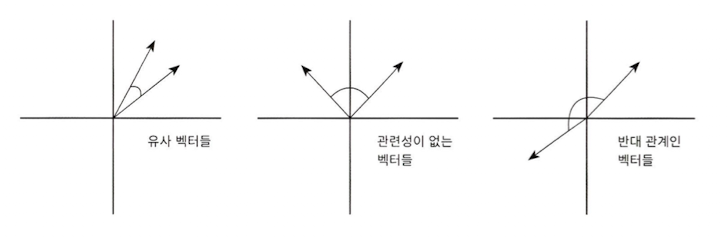

In [25]:
from IPython.display import Image

Image("/Users/ijiseon/Desktop/코사인.png")

- 코사인 유사도가 문서의 유사도 비교에 가장 많이 사용되는 이유가 있음

먼저 문서를 피처벡터화 변환하면 차원이 매우 많은 희소 행렬이 되기 쉬움. 이러한 희소 행렬 기반에서 문서와 문서 벡터 간의 크기에 기반한 유사도 지표 (예를 들어 유클리드 기반 거리 기반 지표)는 정확도가 떨어지기 쉬움

또한 문서가 매우 긴 경우 단어의 빈도수도 더 많을 것이기 때문에 이러한 빈도수에만 기반해서는 공정한 비교를 할 수 없음. <br>
예를 들어, A 문서에서 '머신러닝'이라는 단어가 5번 언급되고 B 문서에서는 3번 언급됐을 때 A 문서가 '머신러닝'과 더 밀접하게 관련된 문서라고 쉽게 판단해서는 안됨. A 문서가 B문서보다 10배 이상 크다면 오히려 B 문서가 '머신러닝'과 더 밀접하게 관련된 문서라고 판단할 수 있음 

In [26]:
import numpy as np

def cos_similarity(v1,v2):
    dot_product = np.dot(v1,v2)
    l2_norm = (np.sqrt(sum(np.square(v1))))*np.sqrt(sum(np.square(v2)))
    similarity = dot_product / l2_norm
    
    return similarity

In [30]:
doc_list = [
    "if you take the blue pill, the story ends",
    "if you take the red pill, you stay in Wonderland",
    "if you take the red pill, I show you how deep the rabbit hole goes"
]

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


반환된 행렬을 희소 행렬이므로 앞에서 작성한 cos_similarity()함수의 인자인 array로 만들기 위해 밀집 행렬로 변환한 뒤 다시 각각을 배열로 변환 

feature_vect_dense[0]은 doc_list 첫 번째 문서의 피처 벡터화이며, feature+vect_dense[1]은 doc_list 두 번째 문서의 피처 벡터화



In [32]:
#TFidVectorizer로 transform()한 결과는 희소 행렬이므로 밀집 행렬로 변환
feature_vect_dense = feature_vect_simple.todense()

#첫 번째 문장과 두 번째 문장의 피처 벡터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect2 = np.array(feature_vect_dense[1]).reshape(-1, )

#첫 번째 문장과 두 번째 문장의 피처 벡터로 두 개 문장의 코사인 유사도 추출
similarity_simple = cos_similarity(vect1, vect2)
print('문장 1, 문장 2 Cosine 유사도 : {0:3f}'.format(similarity_simple))

문장 1, 문장 2 Cosine 유사도 : 0.402078


In [33]:
# 두 번째 문장과 세 번째 문장의 유사도 측정
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple = cos_similarity(vect1, vect3)
print('문장 1, 문장 3 Cosine 유사도 : {0:3f}'.format(similarity_simple))

vect2 = np.array(feature_vect_dense[1]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple = cos_similarity(vect2, vect3)
print('문장 2, 문장 3 Cosine 유사도 : {0:3f}'.format(similarity_simple))

문장 1, 문장 3 Cosine 유사도 : 0.404250
문장 2, 문장 3 Cosine 유사도 : 0.456473


In [34]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


첫 번째 문서와 비교해 바로 자신 문서인 첫 번째 문서, 그리고 두 번째, 세 번째 문서의 유사도를 측정

In [35]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


In [36]:
similarity_simple_pair = cosine_similarity(feature_vect_simple, feature_vect_simple)
print(similarity_simple_pair)
print("shape:", similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape: (3, 3)


## Opinion Review 데이터 세트를 이용한 문서 유사도 측정

In [38]:
from nltk.stem import WordNetLemmatizer
import nltk
import string
nltk.download('punkt')
nltk.download('wordnet')

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

[nltk_data] Downloading package punkt to /Users/ijiseon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/ijiseon/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [92]:
import pandas as pd
import glob, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

import pandas as pd
import glob, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import nltk
import string


path = r'/Users/ijiseon/Desktop/ESAA-OB/OpinosisDataset1.0/topics'


all_files = glob.glob(os.path.join(path, '*.data'))

In [93]:
filename_list = []
opinion_text = []


for file_ in all_files:
    df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')
    filename_ = file_.split('/')[-1]  
    filename = filename_.split('.')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())


In [95]:
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english',
                             ngram_range=(1,2), min_df=0.05, max_df=0.85)
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


In [96]:
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [97]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label=1인 데이터는 호텔로 군집화된 데이터임. DataFrame에서 해당 인덱스를 추출
hotel_indexes = document_df[document_df['cluster_label']==1].index
print('호텔로 군집화된 문서들의 DataFrame Index:', hotel_indexes)

# 호텔로 군집화된 데이터 중 첫 번째 문서를 추출해 파일명 표시
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명 ', comparison_docname, ' 와 타 문서 유사도#####')

''' document_df에서 추출한 Index 객체를 feature_vect로 입력해 호텔 군집화된 feature_vect 추출
이를 이용해 호텔로 군집화된 문서 중 첫 번째 문서와 다른 문서 간의 코사인 유사도 측정 '''

similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]], feature_vect[hotel_indexes])
print(similarity_pair)
     

호텔로 군집화된 문서들의 DataFrame Index: Index([ 0,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 19, 21, 24, 25, 26, 33, 34,
       36, 37, 38, 40, 41, 44, 48],
      dtype='int64')
##### 비교 기준 문서명  battery-life_ipod_nano_8gb  와 타 문서 유사도#####
[[1.         0.01821977 0.01026715 0.22766637 0.04025051 0.79742523
  0.01605138 0.87235155 0.12157277 0.17227799 0.31211549 0.01452646
  0.03505144 0.21032724 0.24196947 0.02589076 0.0399055  0.02477727
  0.02911322 0.2100003  0.0303119  0.02670592 0.03489765 0.01265576
  0.02141378]]


Text(0.5, 1.0, 'battery-life_ipod_nano_8gb')

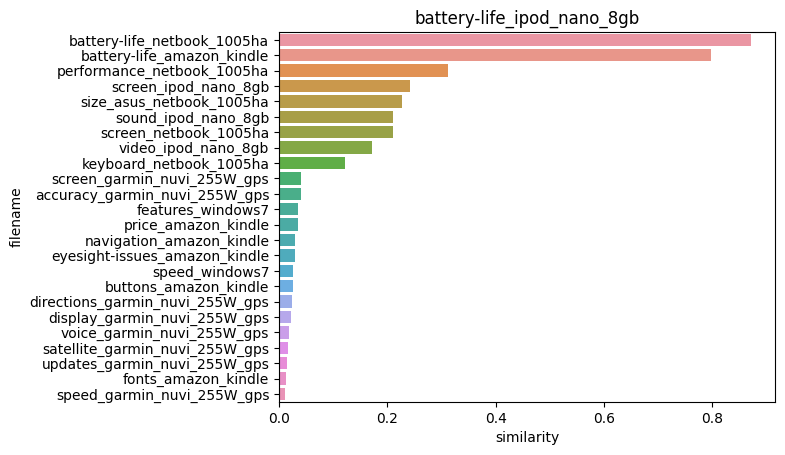

In [98]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 첫 번째 문서와 타 문서 간 유사도가 큰 순으로 정렬한 인덱스를 추출하되 자기 자신은 제외
sorted_index = similarity_pair.argsort()[:, ::-1]
sorted_index = sorted_index[:, 1:]

# 유사도가 큰 순으로 hotel_indexes를 추출해 재정렬
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 인덱스와 유사도 값을 이용해 파일명과 유사도 값을 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

sns.barplot(x='similarity', y='filename', data=hotel_1_sim_df)
plt.title(comparison_docname)

## 한글 텍스트 처리 - 네이버 영화 평점 감성 분석 

In [99]:
pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 7.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.8/381.8 kB 7.1 MB/s eta 0:00:00:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

train_df = pd.read_csv('ratings_train.txt', sep='\t')
train_df.head(3)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


In [2]:
train_df['label'].value_counts()

label
0    75173
1    74827
Name: count, dtype: int64

In [3]:
import re

train_df = train_df.fillna(' ')
# 정규 표현식을 이용해 숫자를 공백으로 변경(정규 표현식으로 \d는 숫자를 의미함)
train_df['document'] = train_df['document'].apply(lambda x : re.sub(r'\d+', ' ', x))

# 테스트 데이터 세트를 로딩하고 동일하게 Null 및 숫자를 공백으로 변환
test_df = pd.read_csv('ratings_test.txt', sep='\t')
test_df = test_df.fillna(' ')
test_df['document'] = test_df['document'].apply(lambda x : re.sub(r'\d+', ' ', x))

# id 칼럼 삭제 수행
train_df.drop('id', axis=1, inplace=True)
test_df.drop('id', axis=1, inplace=True)
     

In [ ]:
from konlpy.tag import Twitter

twitter = Twitter()

def tw_tokenizer(text):
    tokens_ko = twitter.morphs(text)
    return tokens_ko

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Twitter 객체의 morphs() 객체를 이용한 tokenizer를 사용, ngram_range는 (1,2)
tfidf_vect = TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])
     

In [ ]:
# 로지스틱 회귀를 이용해 감정 분석 분류 수행
lg_clf = LogisticRegression(random_state=0)

# 파라미터 C 최적화를 위해 GridSearchCV를 이용
params = {'C': [1,3.5,4.5,5.5,10]}

grid_cv = GridSearchCV(lg_clf, param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_cv.fit(tfidf_matrix_train, train_df['label'])
print(grid_cv.best_params_, round(grid_cv.best_score_, 4))